# Uebung 5

## Aufgabe 1

Erstellen Sie ein GeoDataFrame mit einem Polygon resp. Multipolygon pro Kanton aus dem swissBOUNDARIES3D Datensatz (TLM_KANTONSGEBIET).

Tipp: 

    gs = gpd.GeoSeries([geom1, geom2, geom3, geom4, ...])
    df = pd.DataFrame([attrib1, attrib2, attrib3, attrib4, ... ])
    gdf = gpd.GeoDataFrame(df, geometry=gs)


In [2]:
import fiona
import geopandas as gpd
import pandas as pd
import shapely
import geopandas_stac as stac

basedir = "/data/geo/opengeodata/BOUNDARIES_2021_04/DATEN/swissBOUNDARIES3D/"

gdb = basedir + "FGDB/swissBOUNDARIES3D_1_3_LV95_LN02.gdb"

df = gpd.read_file(gdb, driver='FileGDB', layer="TLM_KANTONSGEBIET")

kantonsnamen = df["NAME"].unique()

geometrie = {}

for kanton in kantonsnamen:
    df_kanton = df.query(f"NAME == '{kanton}'")
    geom = df_kanton["geometry"].unary_union
    geometrie[kanton] = geom
    

In [3]:
geometrie

{'Graubünden': <shapely.geometry.polygon.Polygon at 0x7fd8d5756810>,
 'Bern': <shapely.geometry.multipolygon.MultiPolygon at 0x7fd8d5749d90>,
 'Valais': <shapely.geometry.polygon.Polygon at 0x7fd90c0c5450>,
 'Vaud': <shapely.geometry.multipolygon.MultiPolygon at 0x7fd8d57a7290>,
 'Ticino': <shapely.geometry.polygon.Polygon at 0x7fd8d5749f10>,
 'St. Gallen': <shapely.geometry.multipolygon.MultiPolygon at 0x7fd908132850>,
 'Zürich': <shapely.geometry.polygon.Polygon at 0x7fd90c0070d0>,
 'Fribourg': <shapely.geometry.multipolygon.MultiPolygon at 0x7fd8d580a850>,
 'Luzern': <shapely.geometry.polygon.Polygon at 0x7fd8d573be90>,
 'Aargau': <shapely.geometry.multipolygon.MultiPolygon at 0x7fd8d6176d10>,
 'Uri': <shapely.geometry.polygon.Polygon at 0x7fd8d6176b10>,
 'Thurgau': <shapely.geometry.multipolygon.MultiPolygon at 0x7fd8d52eb150>,
 'Schwyz': <shapely.geometry.polygon.Polygon at 0x7fd8d5749e90>,
 'Jura': <shapely.geometry.polygon.Polygon at 0x7fd8d5756110>,
 'Neuchâtel': <shapely.geome

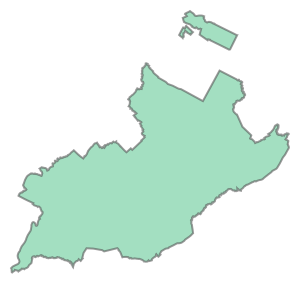

In [4]:
geometrie["Genève"]

In [5]:
# Alternative mit dissolve: viiiiiel einfacher!
kantone_direkt = df.dissolve(by='NAME')
kantone_direkt

,geometry,UUID,DATUM_AENDERUNG,DATUM_ERSTELLUNG,ERSTELLUNG_JAHR,ERSTELLUNG_MONAT,REVISION_JAHR,REVISION_MONAT,GRUND_AENDERUNG,HERKUNFT,...,OBJEKTART,KANTONSNUMMER,SEE_FLAECHE,REVISION_QUALITAET,KANTONSFLAECHE,KANTON_TEIL,ICC,EINWOHNERZAHL,Shape_Length,Shape_Area
NAME,,,,,,,,,,,,,,,,,,,,,
Aargau,MULTIPOLYGON Z (((2655848.686 1230370.051 657....,{E11CD2CA-2E2D-415C-8789-C10D7C26E441},2016-12-09T09:16:30,2012-10-26T12:21:31,2012,10,2021,4,400,100,...,0,19,870.0,2020_Aufbau,140380.0,1,CH,685845.0,328939.456377,1.403783e+09
Appenzell Ausserrhoden,"POLYGON Z ((2755968.016 1246115.811 875.346, 2...",{5B0F52B1-5FE2-465F-835E-0F18F2E348CE},2015-12-08T15:35:39,2012-10-26T12:21:31,2012,10,2021,4,400,500,...,0,15,NaN,2020_Aufbau,24284.0,0,CH,55445.0,168468.699727,2.428365e+08
Appenzell Innerrhoden,MULTIPOLYGON Z (((2744480.834 1246625.895 801....,{3F24991F-68F8-42E5-81EA-D4C8C3E21FE4},2015-12-08T15:35:39,2012-10-26T12:21:31,2012,10,2021,4,400,500,...,0,16,NaN,2020_Aufbau,17248.0,1,CH,16128.0,60849.513971,1.578622e+08
Basel-Landschaft,MULTIPOLYGON Z (((2594299.203 1251545.469 838....,{F78C655C-6AE1-49EA-BA30-575F195C8AEC},2015-12-08T15:35:39,2012-10-26T12:21:31,2012,10,2021,4,400,500,...,0,13,NaN,2020_Aufbau,51767.0,1,CH,289468.0,220298.817003,5.109981e+08
Basel-Stadt,"POLYGON Z ((2608828.375 1265964.023 289.266, 2...",{52CABC6F-FA42-4B84-996D-1165C5EB0B99},2015-12-08T15:35:39,2012-10-26T12:21:31,2012,10,2021,4,400,500,...,0,12,NaN,2020_Aufbau,3695.0,0,CH,195844.0,43258.856706,3.695376e+07
Bern,MULTIPOLYGON Z (((2573485.079 1193470.596 494....,{DDD56CEF-0E61-4EED-85ED-F67A459C93ED},2019-11-06T07:57:58,2012-10-26T12:21:31,2012,10,2021,4,400,100,...,0,2,11897.0,2020_Aufbau,595951.0,1,CH,1039474.0,747009.909625,5.950465e+09
Fribourg,MULTIPOLYGON Z (((2549140.721 1178014.175 680....,{B01E1FB4-9A9B-48AC-BCA3-7D6D93BA23F3},2015-12-09T15:03:16,2012-10-26T12:21:31,2012,10,2021,4,400,500,...,0,10,7818.0,2020_Aufbau,167142.0,1,CH,321783.0,341626.411748,1.520692e+09
Genève,MULTIPOLYGON Z (((2487005.785 1113215.899 348....,{C0A13B16-7F38-4093-AE0D-D3483C1C6C34},2015-12-08T15:35:39,2012-10-26T12:21:31,2012,10,2021,4,400,500,...,0,25,3669.0,2020_Aufbau,28249.0,1,CH,504128.0,117578.468339,2.738998e+08
Glarus,"POLYGON Z ((2730975.070 1192856.440 3027.414, ...",{5AB3C7C0-CAA5-4B89-8712-E77E2A06F4D9},2016-12-09T09:16:30,2012-10-26T12:21:31,2012,10,2021,4,400,100,...,0,8,461.0,2020_Aufbau,68531.0,0,CH,40590.0,158990.652754,6.853143e+08


<AxesSubplot:>

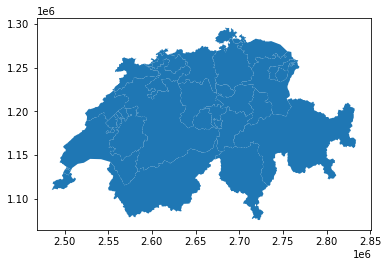

In [6]:
kantone_direkt.plot()

## Aufgabe 2

Erstellen Sie ein GeoDataFrame mit den Gebäudegrundrissen von Gebäuden mit Erstellungsjahr ab 2020 aus dem swissTLM3D Datensatz (Layer TLM_GEBAEUDE_FOOTPRINT).

Exportieren Sie dieses in ein Shapefile oder GeoPackage and stellen Sie diesen Datensatz in einem GIS dar.


Tipp:

Exportieren in ein Shapefile:

    gdf.to_file("filenamme.shp")
    
Exportieren in ein GeoPackage:

    gdf.to_file("filename.gpkg", layer='layername', driver="GPKG")



In [10]:
from shapely.geometry import mapping, shape

In [11]:
basedir = "/data/geo/opengeodata/2021_SWISSTLM3D_FGDB101_CHLV95_LN02/"

gdb = basedir + "SWISSTLM3D_2021_LV95_LN02.gdb"

import fiona

geometries = []
properties = []

footprint_layer = fiona.open(gdb, 'r', layer='TLM_GEBAEUDE_FOOTPRINT')

i = iter(footprint_layer)

cnt = 0
for element in i:
    if element['properties']['ERSTELLUNG_JAHR'] >= 2020:
        geom = shape(element['geometry'])
        geometries.append(geom)
        
        prop = element['properties']
        properties.append(prop)
        
        cnt += 1
    
print(cnt)


5677


In [15]:
gs = gpd.GeoSeries(geometries)
df = pd.DataFrame(properties)
gdf = gpd.GeoDataFrame(df, geometry=gs)
# df und gs müssen Listen sein, bei denen die Indices übereinstimmen 

In [17]:
gdf.head()

,UUID,DATUM_AENDERUNG,DATUM_ERSTELLUNG,ERSTELLUNG_JAHR,ERSTELLUNG_MONAT,REVISION_JAHR,REVISION_MONAT,GRUND_AENDERUNG,HERKUNFT,HERKUNFT_JAHR,HERKUNFT_MONAT,REVISION_QUALITAET,OBJEKTART,NUTZUNG,TLM_BAUTEN_NAME_UUID,NAME,SHAPE_Length,SHAPE_Area,geometry
0,{B12FA61F-229A-41CC-8A29-4CE81B7E3838},2020-11-27T14:29:10,2019-11-22T11:37:01,2020,6,2020,6,200,100,2020,6,None,0,None,None,None,26.860171,38.855273,MULTIPOLYGON Z (((2762739.140 1205050.883 538....
1,{FB29369F-3F8B-412A-A5CF-BBA6E131B852},2020-11-27T09:27:24,2019-11-28T18:01:51,2020,6,2020,6,400,100,2020,6,2015_Aufbau,0,None,None,None,32.338230,56.069668,MULTIPOLYGON Z (((2762659.014 1201746.343 562....
2,{5720154D-A8A9-4229-A433-F7720AB5D09F},2020-11-27T14:34:22,2020-02-07T10:51:09,2020,6,2020,6,200,100,2020,6,None,10,None,None,None,113.423048,697.837502,MULTIPOLYGON Z (((2762534.653 1205306.524 537....
3,{C69F6265-657C-476D-92BF-DC25EF65E9DB},2020-11-27T08:05:33,2020-02-13T16:42:37,2020,6,2020,6,400,100,2020,6,2015_Aufbau,0,None,None,None,159.441636,877.993738,MULTIPOLYGON Z (((2761115.193 1203942.909 523....
4,{DEDB6FBE-10CF-4D9B-9232-BDA34314E522},2020-09-08T13:29:38,2020-04-30T08:49:53,2020,6,2020,6,400,100,2020,6,2016_Aufbau,13,None,None,None,56.322930,209.552241,MULTIPOLYGON Z (((2533854.716 1154196.980 417....


In [16]:
gdf.to_file("daten/gebaeude.shp")